# Probability and Statistics

In [458]:
%matplotlib inline
import torch
from torch.distributions import multinomial
from d2l import torch as d2l

In [459]:
fair_probs = torch.ones([6]) / 6

##### 这行代码创建了一个包含6个元素的张量，每个元素的值都是1。然后，通过除以6，将每个元素的值调整为1/6。这样，fair_probs就表示一个均匀分布的概率分布，每个值出现的概率都是1/6。

In [460]:
multinomial.Multinomial(1, fair_probs).sample()

tensor([0., 0., 0., 0., 1., 0.])

##### 这行代码使用torch.distributions.multinomial.Multinomial类来生成一个多项分布的样本。

In [461]:
# let's try more samples !
multinomial.Multinomial(100,fair_probs).sample()

tensor([22., 23., 11., 24., 10., 10.])

In [462]:
sampleNum = 10000000
counts = multinomial.Multinomial(sampleNum,fair_probs).sample()
probability = counts/sampleNum
print(probability)

tensor([0.1666, 0.1667, 0.1667, 0.1668, 0.1666, 0.1666])


In [463]:
# let's draw a graph of our Multinomial distribution

sample_num = 10
counts = multinomial.Multinomial(sample_num,fair_probs).sample((500,))
cum_counts = counts.cumsum(dim=0)
estimates = cum_counts / cum_counts.sum(dim=1,keepdim=True)

print(estimates)

tensor([[0.1000, 0.1000, 0.1000, 0.3000, 0.2000, 0.2000],
        [0.0500, 0.1000, 0.2000, 0.3000, 0.1500, 0.2000],
        [0.1333, 0.0667, 0.2000, 0.2333, 0.1333, 0.2333],
        ...,
        [0.1657, 0.1727, 0.1655, 0.1671, 0.1635, 0.1657],
        [0.1657, 0.1731, 0.1651, 0.1669, 0.1635, 0.1655],
        [0.1656, 0.1728, 0.1650, 0.1674, 0.1636, 0.1656]])


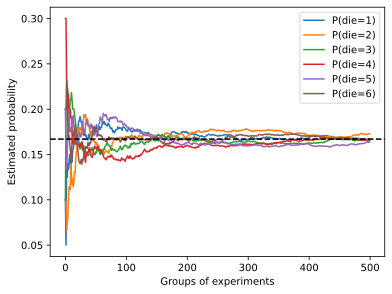

In [464]:
d2l.set_figsize((6, 4.5))
for i in range(6):
    d2l.plt.plot(estimates[:, i].numpy(),
                 label=("P(die=" + str(i + 1) + ")"))
    
# below to make the graph look better
d2l.plt.axhline(y=0.167, color='black', linestyle='dashed')
d2l.plt.gca().set_xlabel('Groups of experiments')
d2l.plt.gca().set_ylabel('Estimated probability')
d2l.plt.legend()